In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/kerasDO/master/HR_comma_sep.csv")
print(df.head(5))

feats = ['department', 'salary']
df_final = pd.get_dummies(df, columns=feats, drop_first=True)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['left'], axis=1).values
y = df_final['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(9, kernel_initializer="uniform", activation="relu", input_dim=18))
classifier.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
classifier.fit(X_train, y_train, batch_size=10, epochs=20)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.4375 - accuracy: 0.8089
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2858 - accuracy: 0.8743
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2374 - accuracy: 0.8897
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2153 - accuracy: 0.9228
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2029 - accuracy: 0.9388
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1934 - accuracy: 0.9458
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1872 - accuracy: 0.9491
Epoch 8/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1815 - accuracy: 0.9492
Epoch 9/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1784 - accuracy: 0.9515
Epoch 10/20
1050/1050 [==============================] - 4s 3ms/step - loss: 0.175

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

new_pred = classifier.predict(sc.transform(np.array([[0.26, 0.7, 3., 238., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]])))
new_pred = (new_pred > 0.5)
new_pred

new_pred = (new_pred > 0.6)
new_pred

1/1 [==============================] - 0s 65ms/step


array([[False]])

In [ ]:
import numpy as np

# Define the new sample
new_sample = np.array([[0.26, 0.7, 3., 238., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]])

# Assuming you have already trained a classifier named 'classifier' and applied scaling named 'sc' to your features

# Scale the new sample using the same scaler used during training
scaled_new_sample = sc.transform(new_sample)

# Make prediction for the new sample
prediction = classifier.predict(scaled_new_sample)

# Print the prediction
print("Predicted satisfaction level:", prediction)


1/1 [==============================] - 0s 27ms/step
Predicted satisfaction level: [[0.00638074]]


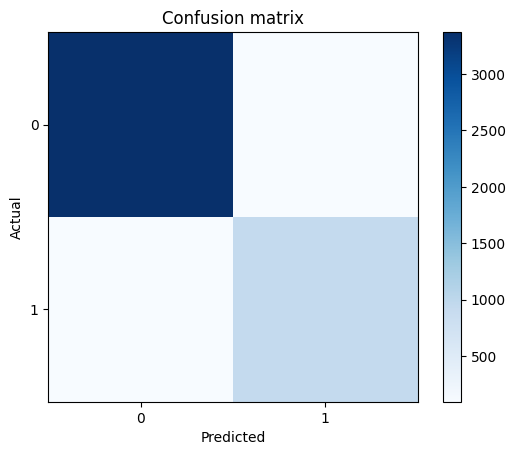

1/1 [==============================] - 0s 47ms/step
Prediction with threshold 0.5: [[False]]
Prediction with threshold 0.6: [[False]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.show()

# Making predictions based on different thresholds
new_pred_prob = classifier.predict(sc.transform(np.array([[0.26, 0.7, 3., 238., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]])))
new_pred_05 = (new_pred_prob > 0.5)
new_pred_06 = (new_pred_prob > 0.6)

print("Prediction with threshold 0.5:", new_pred_05)
print("Prediction with threshold 0.6:", new_pred_06)
